# Data Cross-Compatibility

Joining `group-two` ice velocity data to the Arctic Observation Sites layer

**Process to join Arctic Data Collection Sites with Greenland Ice Velocity Raster**
 - Load the Arctic Data Collection Sites into geopandas - geopandas.read_file()
 - Get the extent of the ice velocity raster - gdalinfo
 - Clip Collection sites to the raster extent:
     - Check CRS of collection sites - 
     - Project collection sites to raster CRS - GeoDataFrame.to_crs()
     - Select point within raster extent using GeoDataFrame.clip()
 - Spatial join of raster values to collection points

In [14]:
!ogrinfo -so -al /home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-five/arctic_data_collection_sites.gpkg

INFO: Open of `/home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-five/arctic_data_collection_sites.gpkg'
      using driver `GPKG' successful.
Metadata:
  TITLE=WFS

Layer name: public_Arctic_Data_Collection_Sites:Sites
Metadata:
  TITLE=Sites
Geometry: Point
Feature Count: 13880
Extent: (-5079198.597576, -5692650.274471) - (5551747.058708, 5621232.906434)
Layer SRS WKT:
PROJCRS["WGS 84 / North Pole LAEA Alaska",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT[

In [34]:
# Read in the data collection sites
import geopandas as gpd

sites = gpd.read_file("/home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-five/arctic_data_collection_sites.gpkg")

In [17]:
sites

gml_id  OBJECTID Proj_Award      Proj_Funding_Country  \
0          Sites.1         1         32             United States   
1          Sites.2         2         32             United States   
2          Sites.3         3         32             United States   
3          Sites.4         4         32             United States   
4          Sites.5         5         32             United States   
...            ...       ...        ...                       ...   
13875  Sites.13930     13930    0856868  United States of America   
13876  Sites.13931     13931    0856868  United States of America   
13877  Sites.13932     13932    0856868  United States of America   
13878  Sites.13933     13933    0856868  United States of America   
13879  Sites.13934     13934    0856868  United States of America   

      Proj_Funding_Agency Proj_Program_Code Proj_Start_Year Proj_End_Year  \
0                    USGS               NaN            1999           NaN   
1                    USGS               NaN            1999           NaN   
2                    USGS               NaN            1999           NaN   
3                    USGS               NaN            1999           NaN   
4                    USGS               NaN            1999           NaN   
...                   ...               ...             ...           ...   
13875                 NSF               NaN            2009          2016   
13876                 NSF               NaN            2009          2016   
13877                 NSF               NaN            2009          2016   
13878                 NSF               NaN            2009          2016   
13879                 NSF               NaN            2009          2016   

                                              Proj_Title  \
0          GTN-Permafrost and Climate-Monitoring Network   
1          GTN-Permafrost and Climate-Monitoring Network   
2          GTN-Permafrost and Climate-Monitoring Network   
3          GTN-Permafrost and Climate-Monitoring Network   
4          GTN-Permafrost and Climate-Monitoring Network   
...                                                  ...   
13875  An Array of Autonomous Ocean Flux Buoys to Dir...   
13876  An Array of Autonomous Ocean Flux Buoys to Dir...   
13877  An Array of Autonomous Ocean Flux Buoys to Dir...   
13878  An Array of Autonomous Ocean Flux Buoys to Dir...   
13879  An Array of Autonomous Ocean Flux Buoys to Dir...   

                                        Proj_Initiative  ... Site_Start_Year  \
0      GTN-P: Global Terrestrial Network for Permafrost  ...          1998.0   
1      GTN-P: Global Terrestrial Network for Permafrost  ...          1998.0   
2      GTN-P: Global Terrestrial Network for Permafrost  ...          1998.0   
3      GTN-P: Global Terrestrial Network for Permafrost  ...          1998.0   
4      GTN-P: Global Terrestrial Network for Permafrost  ...          1998.0   
...                                                 ...  ...             ...   
13875                                               NaN  ...          2010.0   
13876                                               NaN  ...          2012.0   
13877                                               NaN  ...          2011.0   
13878                                               NaN  ...          2011.0   
13879                                               NaN  ...          2010.0   

      Site_End_Year                          Site_Type  \
0               NaN             Meteorological Station   
1               NaN             Meteorological Station   
2               NaN             Meteorological Station   
3               NaN             Meteorological Station   
4               NaN             Meteorological Station   
...             ...                                ...   
13875        2011.0  Autonomous Ocean Flux Buoy (AOFB)   
13876        2013.0  Autonomous Ocean Flux Buoy (AOFB)   
13877        2012.0  Autonomous Ocean Flux Buoy (AOFB)

In [16]:
!gdalinfo /home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-two/velocity2021/GL_vel_mosaic_Annual_01Dec20_30Nov21_vv_v04.0.tif

Driver: GTiff/GeoTIFF
Files: /home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-two/velocity2021/GL_vel_mosaic_Annual_01Dec20_30Nov21_vv_v04.0.tif
Size is 7585, 13700
Coordinate System is:
PROJCRS["WGS 84 / NSIDC Sea Ice Polar Stereographic North",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERS

<AxesSubplot: >

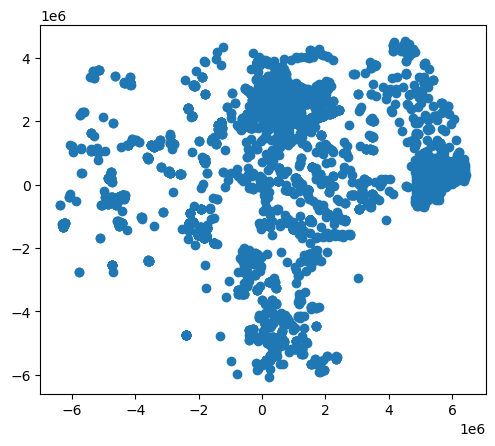

In [19]:
# reproject sites into 3413
sites_reproj = sites.to_crs(epsg=3413)

sites_reproj.plot()

In [20]:
# clip sites to within ratser extent
sites_clip = sites_reproj.clip(mask=(-659100, -3379100, 857900, -639100))

sites_clip.plot()

<AxesSubplot: >

In [21]:
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

src = rasterio.open("/home/jovyan/shared-public/QGreenland-Researcher-Workshop/group-two/velocity2021/GL_vel_mosaic_Annual_01Dec20_30Nov21_vv_v04.0.tif")

In [22]:
# Visualize the raster and point layers together

from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")

sites_clip.plot(ax=ax)

<AxesSubplot: >

In [35]:
sites_clip.to_file("arctic_data_collection_sites_clipped.gpkg", layer='sites', driver='GPKG')

ValueError: Invalid field type <class 'numpy.ndarray'>

In [26]:
# sample the ice velocty data and add it to the collection sites layer

coord_list = [(x, y) for x, y in zip(sites_clip["geometry"].x, sites_clip["geometry"].y)]
print(coord_list)

[(-143394.7450952512, -3310793.6870943555), (-143333.23407373484, -3310043.517435274), (-143333.23407373484, -3310043.517435274), (-476568.34052324924, -3183813.4947931725), (-476547.74301700294, -3183789.7533709346), (-476698.1734203244, -3183738.3350888165), (-415976.1729750616, -3043228.6663895277), (-465265.24480297934, -2735855.974204662), (-241932.1302893583, -2512561.239498682), (229794.5886829484, -3066588.0107252165), (229791.8101409616, -3066584.3302742387), (230282.95939135202, -3064453.6437671175), (230280.20013371442, -3064451.0670940615), (230259.41667302238, -3063941.5622330974), (230260.31837177134, -3063937.660183539), (-68146.52368694231, -3207091.0855239523), (-71692.51593935188, -2711957.1311622984), (-51654.69667833486, -2642159.943101618), (-51462.66042044112, -2640354.601046357), (-51462.66042044112, -2640354.601046357), (-51461.33868823549, -2640286.787962274), (-32786.97921189369, -2561538.3963368894), (-40741.28628703181, -2283320.6916255057), (-39931.74262812

In [27]:
sites_clip["ice_velocity"] = [x for x in src.sample(coord_list)]

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
